# Listing 6.1 Creating features from the input text of the reviews

In [1]:
import nltk
nltk.download('stopwords')

from tika import parser
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to /home/rob/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def review_to_words(raw_review) :
    review_text = parser.from_buffer("<html>" + raw_review + "</html>")["content"]
    
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return (" ".join(meaningful_words))

# Listing 6.2 Use Pandas to read the movie reviews and apply your cleaning function

In [3]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm

/home/rob/Developer/MLwithTensorFlow2ed/.venv/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
train = pd.read_csv("../../data/labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)

print(train.shape)
print(train.columns.values)

(25000, 3)
['id' 'sentiment' 'review']


In [5]:
num_reviews = train["review"].size
clean_train_reviews = []

for i in tqdm(range(0, num_reviews)):
    clean_train_reviews.append(review_to_words(train["review"][i]))

<ipython-input-5-94981b8b2349>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(0, num_reviews)):


In [6]:
len(clean_train_reviews)

25000

# Listing 6.3 Apply the Bag of Words model to obtain your training data

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(
    analyzer="word",
    tokenizer=None,
    preprocessor=None,
    stop_words=None,
    max_features=5000
)

In [8]:
train_data_features = vectorizer.fit_transform(clean_train_reviews)
print(train_data_features)
train_data_features = train_data_features.toarray()
print(train_data_features.shape)

  (0, 4266)	1
  (0, 1904)	3
  (0, 2874)	1
  (0, 4180)	1
  (0, 2590)	1
  (0, 2933)	2
  (0, 4834)	1
  (0, 3068)	1
  (0, 1272)	1
  (0, 4832)	2
  (0, 2757)	3
  (0, 4809)	1
  (0, 1872)	1
  (0, 681)	1
  (0, 2264)	1
  (0, 1981)	2
  (0, 4477)	1
  (0, 3557)	2
  (0, 946)	2
  (0, 1398)	1
  (0, 2688)	1
  (0, 2835)	1
  (0, 4878)	1
  (0, 1976)	2
  (0, 2260)	1
  :	:
  (24999, 3782)	1
  (24999, 3521)	1
  (24999, 1434)	1
  (24999, 4695)	1
  (24999, 2898)	1
  (24999, 3003)	1
  (24999, 2041)	1
  (24999, 4927)	3
  (24999, 369)	1
  (24999, 1372)	1
  (24999, 4227)	1
  (24999, 735)	3
  (24999, 4706)	1
  (24999, 3815)	1
  (24999, 533)	1
  (24999, 1032)	1
  (24999, 2761)	1
  (24999, 2439)	1
  (24999, 84)	1
  (24999, 1951)	1
  (24999, 4392)	1
  (24999, 180)	1
  (24999, 743)	1
  (24999, 532)	1
  (24999, 1156)	1
(25000, 5000)


# Listing 6.4 Exploratory data analysis regarding the returned Bag of Words

In [9]:
import matplotlib.pyplot as plt

In [10]:
vocab = vectorizer.get_feature_names()
print("size %d %s " % (len(vocab), vocab))

size 5000 ['abandoned', 'abc', 'abilities', 'ability', 'able', 'abraham', 'absence', 'absent', 'absolute', 'absolutely', 'absurd', 'abuse', 'abusive', 'abysmal', 'academy', 'accent', 'accents', 'accept', 'acceptable', 'accepted', 'access', 'accident', 'accidentally', 'accompanied', 'accomplished', 'according', 'account', 'accuracy', 'accurate', 'accused', 'achieve', 'achieved', 'achievement', 'acid', 'across', 'act', 'acted', 'acting', 'action', 'actions', 'activities', 'actor', 'actors', 'actress', 'actresses', 'acts', 'actual', 'actually', 'ad', 'adam', 'adams', 'adaptation', 'adaptations', 'adapted', 'add', 'added', 'adding', 'addition', 'adds', 'adequate', 'admire', 'admit', 'admittedly', 'adorable', 'adult', 'adults', 'advance', 'advanced', 'advantage', 'adventure', 'adventures', 'advertising', 'advice', 'advise', 'affair', 'affect', 'affected', 'afford', 'aforementioned', 'afraid', 'africa', 'african', 'afternoon', 'afterwards', 'age', 'aged', 'agent', 'agents', 'ages', 'aging', 

In [12]:
import numpy as np
dist = np.sum(train_data_features, axis=0)

187, abandoned
125, abc
108, abilities
454, ability
1259, able
85, abraham
116, absence
83, absent
352, absolute
1485, absolutely
306, absurd
192, abuse
91, abusive
98, abysmal
297, academy
485, accent
203, accents
300, accept
130, acceptable
144, accepted
92, access
318, accident
200, accidentally
88, accompanied
124, accomplished
296, according
186, account
81, accuracy
284, accurate
123, accused
179, achieve
139, achieved
124, achievement
90, acid
971, across
1251, act
660, acted
6494, acting
3355, action
311, actions
83, activities
2389, actor
4488, actors
1219, actress
369, actresses
394, acts
793, actual
4240, actually
148, ad
303, adam
98, adams
454, adaptation
80, adaptations
154, adapted
810, add
440, added
166, adding
347, addition
337, adds
113, adequate
124, admire
621, admit
134, admittedly
101, adorable
511, adult
376, adults
101, advance
90, advanced
153, advantage
510, adventure
204, adventures
91, advertising
259, advice
90, advise
346, affair
93, affect
113, affected


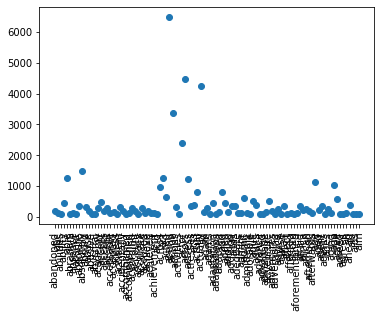

In [13]:
for tag, count in zip(vocab, dist):
    print("%d, %s" % (count, tag))
    
plt.scatter(vocab[:99], dist[:99])
plt.xticks(vocab[:99], rotation="vertical")
plt.show()